## Workplace Satisfaction Survey Analysis


<h4>Importing Modules</h4>

In [1]:
import numpy as np
import pandas as pd  #for dataframes
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

plt.style.use('seaborn-whitegrid')

<h4>Loading Datasets</h4>

In [2]:
#creating a Pandas DataFrame
#using read_excel function
#that reads from a excel file.

survey_data_file = './Dataset/WorkPlaceSatisfactionSurveyData.xlsx'
df_survey_data = pd.read_excel(survey_data_file)

additional_survey_data_file = './Dataset/WorkPlaceSatisfactionSurveyData_add.xlsx'
df_additional_survey_data = pd.read_excel(additional_survey_data_file)

<h4>Summary of Data </h4>

In [3]:
df_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [4]:
df_additional_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  8 non-null      int64  
 1   gender                  8 non-null      int64  
 2   age                     8 non-null      int64  
 3   family                  8 non-null      int64  
 4   education               8 non-null      int64  
 5   years_of_service        8 non-null      int64  
 6   salary                  8 non-null      int64  
 7   sat_management          8 non-null      int64  
 8   sat_colleques           8 non-null      int64  
 9   sat_workingEnvironment  8 non-null      int64  
 10  palkkat                 8 non-null      int64  
 11  sat_tasks               8 non-null      int64  
 12  healtCare               8 non-null      int64  
 13  holidayCabin            0 non-null      float64
 14  gym                     4 non-null      float6

<h4>Data Cleaning and Preparation</h4>

<h5>Renaming Column and Merging The Data Frames <h5>

 There are two columns with different name but with same meaning and similar data. So rename the column palkkat to sat_salary from df_additional_survey_data and concat it to the main survey data frame. The column name for healthcare is different  rename these column on both data frame.

In [5]:
df_survey_data = df_survey_data.rename(columns={'healtcare':'healthCare'})
df_additional_survey_data = df_additional_survey_data.rename(columns={'healtCare':'healthCare','palkkat':'sat_salary'})
df_survey_data = pd.concat([df_survey_data,df_additional_survey_data],ignore_index=True)

Checking Dataset After Merge

In [6]:
df_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  90 non-null     int64  
 1   gender                  90 non-null     int64  
 2   age                     90 non-null     int64  
 3   family                  90 non-null     int64  
 4   education               89 non-null     float64
 5   years_of_service        88 non-null     float64
 6   salary                  90 non-null     int64  
 7   sat_management          90 non-null     int64  
 8   sat_colleques           89 non-null     float64
 9   sat_workingEnvironment  90 non-null     int64  
 10  sat_salary              90 non-null     int64  
 11  sat_tasks               90 non-null     int64  
 12  healthCare              55 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     13 non-null     floa

In [7]:
df_survey_data.tail()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare
85,86,1,40,1,2.0,0.0,2500,3,4.0,3,2,3,1.0,NaN,1.0,NaN
86,87,1,31,1,4.0,1.0,3500,4,4.0,3,3,3,1.0,NaN,1.0,NaN
87,88,1,28,1,4.0,0.0,4600,4,3.0,2,4,2,1.0,NaN,NaN,NaN
88,89,1,29,1,4.0,0.0,3900,4,3.0,3,4,3,1.0,NaN,NaN,NaN
89,90,2,31,2,2.0,0.0,2400,4,3.0,2,2,3,1.0,NaN,1.0,NaN


Checking for missing values using isnull()


In [8]:
df_survey_data.isnull()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
86,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
87,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
88,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


Replace NaN values with zeros

In [9]:
df_survey_data = df_survey_data.fillna(0)
df_survey_data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,0.0,0.0,0.0,0.0
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,0.0,0.0,0.0,0.0
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,0.0,0.0,0.0
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,0.0,0.0,0.0
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,0.0,0.0,0.0


Convert columns with datatype float to int

In [10]:
#displaying datatypes
df_survey_data.dtypes

number                      int64
gender                      int64
age                         int64
family                      int64
education                 float64
years_of_service          float64
salary                      int64
sat_management              int64
sat_colleques             float64
sat_workingEnvironment      int64
sat_salary                  int64
sat_tasks                   int64
healthCare                float64
holidayCabin              float64
gym                       float64
muscleCare                float64
dtype: object

In [11]:
df_survey_data = df_survey_data.astype({"education":'int', "years_of_service":'int',"sat_colleques":'int',"healthCare":'int',"holidayCabin":'int',"gym":'int',"muscleCare":'int'}) 

In [12]:
df_survey_data.dtypes

number                    int64
gender                    int64
age                       int64
family                    int64
education                 int32
years_of_service          int32
salary                    int64
sat_management            int64
sat_colleques             int32
sat_workingEnvironment    int64
sat_salary                int64
sat_tasks                 int64
healthCare                int32
holidayCabin              int32
gym                       int32
muscleCare                int32
dtype: object

In [13]:
df_survey_data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare
0,1,1,38,1,1,22,3587,3,3,3,3,3,0,0,0,0
1,2,1,29,2,2,10,2963,1,5,2,1,3,0,0,0,0
2,3,1,30,1,1,7,1989,3,4,1,1,3,1,0,0,0
3,4,1,36,2,1,14,2144,3,3,3,3,3,1,0,0,0
4,5,1,24,1,2,4,2183,2,3,2,1,2,1,0,0,0


Change gender and education column(categorical) data  to respective string


Gender: 1-male, 2-female

Education: primary school=1, secondary school graduate=2, bachelor level=3, master level=4 

In [14]:
df_survey_data['gender'] = df_survey_data['gender'].map({1:'male', 2:'female'})

In [15]:
df_survey_data['gender'].unique()

array(['male', 'female'], dtype=object)

In [16]:
df_survey_data['education']= df_survey_data['education'].map({1:'primary school',2:'secondary school graduate',3:'bachelor',4:'master'})

In [17]:
#view updated DataFrame
df_survey_data.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare
0,1,male,38,1,primary school,22,3587,3,3,3,3,3,0,0,0,0
1,2,male,29,2,secondary school graduate,10,2963,1,5,2,1,3,0,0,0,0
2,3,male,30,1,primary school,7,1989,3,4,1,1,3,1,0,0,0
3,4,male,36,2,primary school,14,2144,3,3,3,3,3,1,0,0,0
4,5,male,24,1,secondary school graduate,4,2183,2,3,2,1,2,1,0,0,0


Calculate Overall Satisfaction 

Here we calculate overall satisfaction score for each of the survey participants and add it as column in the dataset. This is calculated by taking average of the sum of  all the satisfaction score of different category (sat_management,sat_colleques,sat_workingEnvironment,sat_salary and sat_tasks) . 

In [18]:
#define new column that shows average of row values for points and rebounds columns
df_survey_data['overall_satisfaction'] = df_survey_data[['sat_management', 'sat_colleques','sat_workingEnvironment','sat_salary','sat_tasks']].mean(axis=1)

In [19]:
#view updated DataFrame
df_survey_data

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healthCare,holidayCabin,gym,muscleCare,overall_satisfaction
0,1,male,38,1,primary school,22,3587,3,3,3,3,3,0,0,0,0,3.0
1,2,male,29,2,secondary school graduate,10,2963,1,5,2,1,3,0,0,0,0,2.4
2,3,male,30,1,primary school,7,1989,3,4,1,1,3,1,0,0,0,2.4
3,4,male,36,2,primary school,14,2144,3,3,3,3,3,1,0,0,0,3.0
4,5,male,24,1,secondary school graduate,4,2183,2,3,2,1,2,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,male,40,1,secondary school graduate,0,2500,3,4,3,2,3,1,0,1,0,3.0
86,87,male,31,1,master,1,3500,4,4,3,3,3,1,0,1,0,3.4
87,88,male,28,1,master,0,4600,4,3,2,4,2,1,0,0,0,3.0
88,89,male,29,1,master,0,3900,4,3,3,4,3,1,0,0,0,3.4


Create some classification for quantitative variable

Adding a age-group column to group participants based on their age

We want to analyze satisfaction rate by age group but we do not have age group so we must pack the ages in bins representing age group.We create bins of ages and names for those bins

In [20]:
#Checking minimum and maximum age of participants
df_survey_data.age.min()

20

In [21]:
df_survey_data.age.max()

61

In [22]:
# her we define the threshhold or our age groups
age_groups = [20,40,60,100]

# and for convenience we give each of them a handy label
age_group_names = ['20-40', '40-60','>60']




We create a new category column, that gives the participants’s age group using the pandas.cut method with the bins and the names parameters we just add the column in our data frame

In [23]:
df_survey_data['age_group'] = pd.cut(df_survey_data['age'], bins=age_groups, labels=age_group_names)

In [24]:
df_survey_data[['age','age_group']]

,age,age_group
0,38,20-40
1,29,20-40
2,30,20-40
3,36,20-40
4,24,20-40
...,...,...
85,40,20-40
86,31,20-40
87,28,20-40
88,29,20-40


Creating salary-range column to group participants based on their salary

In [25]:
#Checking minimum and maximum salary of participants
df_survey_data.salary.min()


1521

In [26]:
df_survey_data.salary.max()

6278

In [27]:
# her we define the threshhold for salary range
salary_range = [1000,2000,4000,6000,8000]

# and for convenience we give each of them a handy label
salary_range_names = ['1000-2000','2000-4000','4000-6000','6000-8000']

In [28]:
df_survey_data['salary_range'] = pd.cut(df_survey_data['salary'], bins=salary_range, labels=salary_range_names)

In [29]:
df_survey_data['salary_range'].unique()

['2000-4000', '1000-2000', '4000-6000', '6000-8000']
Categories (4, object): ['1000-2000' < '2000-4000' < '4000-6000' < '6000-8000']

<h4>Analysing Data </h4>

Education Levels Distribution of Employees

In [30]:
df_education_distribution = pd.crosstab(df_survey_data['education'], 'Count')
df_education_distribution['Percentage'] = df_education_distribution['Count'] / df_education_distribution['Count'].sum() * 100
df_education_distribution['Percentage']= df_education_distribution['Percentage'].round(2)

df_education_distribution

col_0,Count,Percentage
education,,
bachelor,23,25.84
master,5,5.62
primary school,27,30.34
secondary school graduate,34,38.20


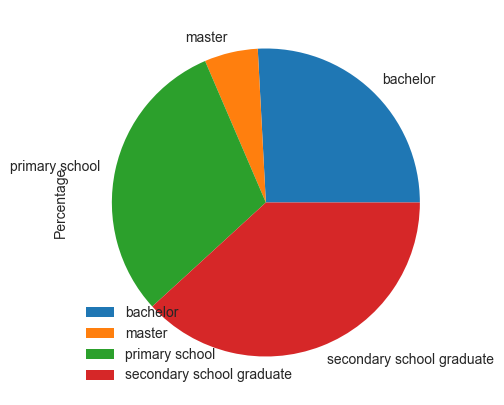

In [31]:
plot= df_education_distribution.plot.pie(y='Percentage' ,figsize=(8, 5))

Average Overall Satisfaction by Gender

In [32]:
df_survey_data[["gender","overall_satisfaction"]].groupby("gender").mean()

,overall_satisfaction
gender,
female,3.523810
male,3.011594


Here we can see on average female employee are more satisfied with the workplace than the male employees

In [33]:
df_survey_data[["age_group","overall_satisfaction"]].groupby("age_group").mean()

,overall_satisfaction
age_group,
20-40,3.077419
40-60,3.307692
>60,2.000000


No of Employee using/not_using different service benefits

In [34]:
df_employee_services=pd.DataFrame(df_survey_data['healthCare'].value_counts());

df_employee_services['holidayCabin'] = df_survey_data['holidayCabin'].value_counts() 

df_employee_services['gym'] = df_survey_data['gym'].value_counts()

df_employee_services['musclecare'] = df_survey_data['muscleCare'].value_counts()


df_employee_services.index = ['used','not_used']

df_employee_services

,healthCare,holidayCabin,gym,musclecare
used,55,20,13,23
not_used,35,70,77,67


<AxesSubplot:>

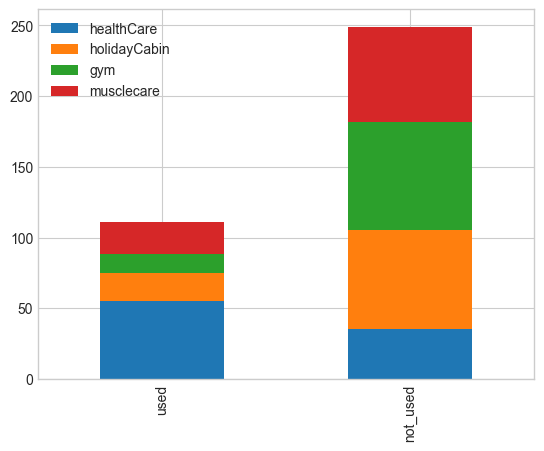

In [35]:
df_employee_services.plot(kind="bar" ,stacked=True)

Here we can see health care services are used by many employees. Other services are rarely taken by emloyees so the business can 
bring some changes to those facilities which has lower no of employee using it or giving more benefits on those service area that are most used

<h3>Analysing Relationship between different variable using Chi-square Test</h3> 

Analysis Question 01 : Is there any evidence of a relationship between the salary range and salary satisfaction ?

<p>Hypothesis testing: <p>
<p>H₀: whether employee salary range and their salary satisfaction level  are independent, i.e. no relationship </p>
<p>H₁: whether employee salary range  and their salary satisfaction level are dependent, i.e. ∃ a relationship</p>
<p>α = 0.05</p>

 Create contingency table

In [36]:
df_contigency_salary_and_satisfaction = pd.crosstab(df_survey_data['salary_range'],df_survey_data['sat_salary'])

# adding column name to the respective columns
df_contigency_salary_and_satisfaction.columns =['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied','Very Satisfied']

df_contigency_salary_and_satisfaction

,Very Unsatisfied,Unsatisfied,Neutral,Satisfied,Very Satisfied
salary_range,,,,,
1000-2000,9,6,4,0,0
2000-4000,24,15,17,8,1
4000-6000,0,2,0,3,0
6000-8000,0,0,0,1,0


Heatmaps to visually see the contigency table

<AxesSubplot:ylabel='salary_range'>

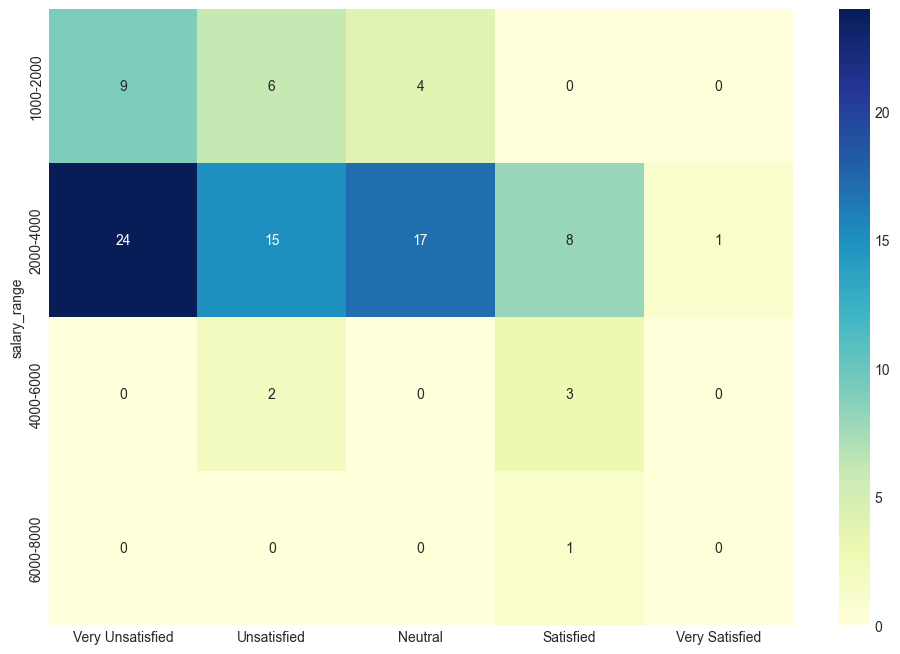

In [37]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_contigency_salary_and_satisfaction, annot=True, cmap="YlGnBu")

In [38]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
c, p, dof, expected = chi2_contingency(df_contigency_salary_and_satisfaction) 


# The p-value approach
if p <= alpha:
    print("Null Hypothesis is rejected.")

print("chisquare-score is:", c, " and p value is:", p)

Null Hypothesis is rejected.
chisquare-score is: 22.31759773407371  and p value is: 0.03411068063766979


Conclusion: We have enough evidence that there is an association between employee salary and their  salary satisfaction, at 5% significance level

Analysis Question 02 : Is there any evidence of a relationship between years of service and working environment satisfaction  ?

<p>Hypothesis testing: <p>
<p>H₀: whether employee year of service and their working environment satisfaction level  are independent, i.e. no relationship </p>
<p>H₁: whether employee year of service  and their working environment satisfaction level are dependent, i.e. ∃ a relationship</p>

In [ ]:
df_year_of_service_and_working_environment_satisfaction = pd.crosstab(df_survey_data['years_of_service'],df_survey_data['sat_workingEnvironment'])

# adding column name to the respective columns
df_year_of_service_and_working_environment_satisfaction.columns =['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied','Very Satisfied']

df_year_of_service_and_working_environment_satisfaction

In [53]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
c, p, dof, expected = chi2_contingency(df_year_of_service_and_working_environment_satisfaction) 


# The p-value approach
if p <= alpha:
    print("Null Hypothesis is rejected.")

print("chisquare-score is:", c, " and p value is:", p)


chisquare-score is: 115.78753732898119  and p value is: 0.2867977913839908


Since the p-value is 0.28 we can draw an conclusion there is no relation between year of service and working environment satisfaction.

### Analysis Question 03 : Is there any evidence of relationship between education level and satisfaction with salary.


In [ ]:
df_education_sat = pd.crosstab(df_survey_data['education'], df_survey_data['sat_salary'])
df_education_sat.index = ['primary', 'secondary', 'bachelor', 'master']
df_education_sat.columns = ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied','Very Satisfied']
df_education_sat

<AxesSubplot:>

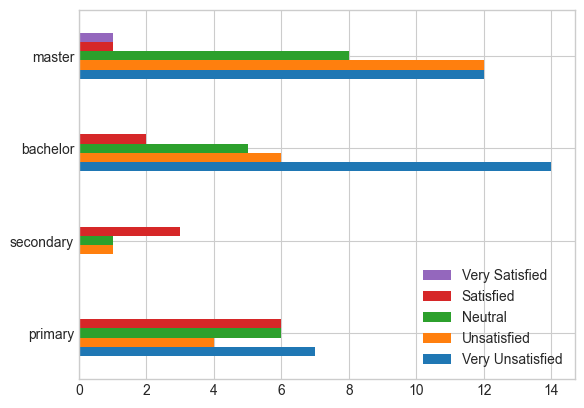

In [57]:
df_education_sat.plot.barh(legend = 'reverse')

In [56]:
# significance level..
alpha = 0.05

# Calculation of Chisquare
c, p, dof, expected = chi2_contingency(df_education_sat) 


# The p-value approach
if p <= alpha:
    print("Null Hypothesis is rejected.")

print("chisquare-score is:", c, " and p value is:", p)

Null Hypothesis is rejected.
chisquare-score is: 22.005435527670045  and p value is: 0.03745893998010996


### Since P value is 0.03, we can conclude that there is link of education level on salary satisfaction among the employees. 